m = 70.33368435734216 
c = -60.06608318742425
O peso estimado de uma pessoa com altura de 2.1 é 87.63 kg.


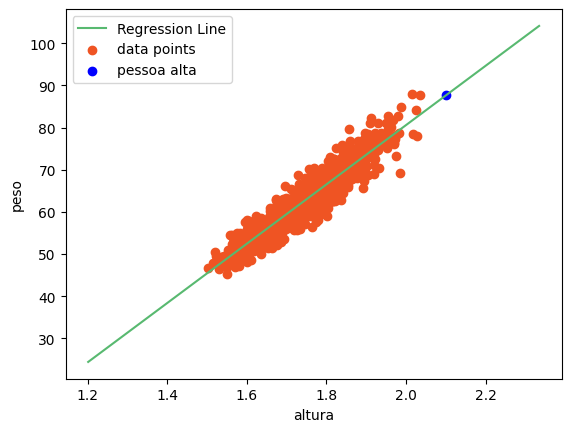

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def read_file(filename):
    with open(filename, "r") as f:
        lines = f.readlines()
        x = []
        y = []
        for line in lines:
            elements = line.split()
            x.append(float(elements[0]))
            y.append(float(elements[1]))
    return x, y

def calculate_regression(altura, peso):
    mean_x = np.mean(altura)
    mean_y = np.mean(peso)
    m = len(altura)

    numer = 0
    denom = 0
    for x, y in zip(altura, peso):
        numer += (x - mean_x) * (y - mean_y)
        denom += (x - mean_x) ** 2

    m = numer / denom
    c = mean_y - (m * mean_x)

    print(f"m = {m} \nc = {c}")

    return m, c

def plot_pessoa_alta(altura_conhecida, m, c):
    peso_estimado = m * altura_conhecida + c
    print(f"O peso estimado de uma pessoa com altura de {altura_conhecida} é {peso_estimado:.2f} kg.")
    plt.scatter(altura_conhecida, peso_estimado, c="blue", label="pessoa alta")


def plot_regression(altura, peso, m, c):
    max_x = np.max(altura) + 0.3
    min_x = np.min(altura) - 0.3

    x = np.linspace(min_x, max_x, 100)
    y = c + m * x
    plt.plot(x, y, color="#58b970", label="Regression Line")
    plt.scatter(altura, peso, c="#ef5423", label="data points")

    plot_pessoa_alta(2.1, m, c)

    plt.xlabel("altura")
    plt.ylabel("peso")
    plt.legend()
    plt.show()

filename = "pesos.txt"
altura, peso = read_file(filename)
m, c = calculate_regression(altura, peso)
plot_regression(altura, peso, m, c)



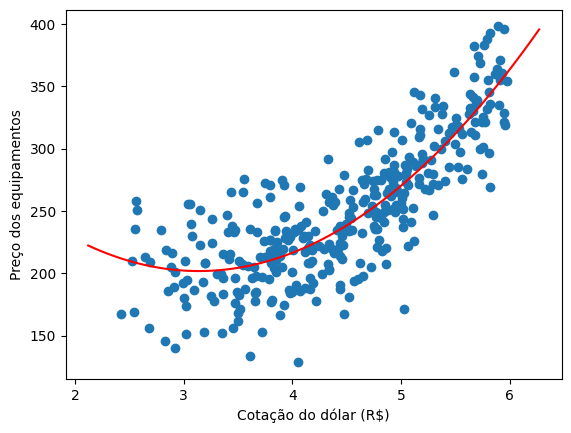

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def read_file(filename):
    with open(filename, "r") as f:
        lines = f.readlines()
        x = []
        y = []
        for line in lines:
            elements = line.split()
            x.append(float(elements[0]))
            y.append(float(elements[1]))
    return x, y

def calculate_sums(x, y):
    n = len(x)
    x_sum, x_squared_sum, x_cubed_sum, x_fourth_sum, y_sum, xy_sum, x_squared_y_sum = [0] * 7

    for xi, yi in zip(x, y):
        x_sum += xi
        x_squared_sum += xi**2
        x_cubed_sum += xi**3
        x_fourth_sum += xi**4
        y_sum += yi
        xy_sum += xi * yi
        x_squared_y_sum += (xi**2) * yi

    return n, x_sum, x_squared_sum, x_cubed_sum, x_fourth_sum, y_sum, xy_sum, x_squared_y_sum


def calculate_matrix_A_and_vector_B(n, x_sum, x_squared_sum, x_cubed_sum, x_fourth_sum, y_sum, xy_sum, x_squared_y_sum):
    A = [[n, x_sum, x_squared_sum], [x_sum, x_squared_sum, x_cubed_sum], [x_squared_sum, x_cubed_sum, x_fourth_sum]]
    B = [y_sum, xy_sum, x_squared_y_sum]
    return A, B


def solve_linear_system(A, B):
    n = len(A)
    M = A

    for i in range(n):
        M[i].append(B[i])

    for i in range(n):
        for j in range(i, n):
            if abs(M[i][i]) < abs(M[j][i]):
                M[i], M[j] = M[j], M[i]
            else:
                pass

        if M[i][i] == 0.0:
            return None

        for j in range(i+1, n):
            ratio = M[j][i] / M[i][i]

            for k in range(n+1):
                M[j][k] = M[j][k] - ratio * M[i][k]

    x = [0] * n

    for i in range(n-1, -1, -1):
        x[i] = M[i][n] / M[i][i]

        for k in range(i-1, -1, -1):
            M[k][n] -= M[k][i] * x[i]

    return x


def quadratic_regression(x, y):
    n, x_sum, x_squared_sum, x_cubed_sum, x_fourth_sum, y_sum, xy_sum, x_squared_y_sum = calculate_sums(x, y)
    A, B = calculate_matrix_A_and_vector_B(n, x_sum, x_squared_sum, x_cubed_sum, x_fourth_sum, y_sum, xy_sum, x_squared_y_sum)
    coefficients = solve_linear_system(A, B)
    b1, b2, b3 = coefficients
    return b1, b2, b3


def calculate_regression(x, y):
    x, y = np.array(x), np.array(y)
    learning_rate = 0.001
    iterations = 1000
    coefficients = [0, 0, 0]
    
    for _ in range(iterations):
        gradients = [2 * x * y - 4 * x**2 * y + 2 * x**3 * y, -2 * y + 4 * x * y - 4 * x**2 * y, -2 * x**2 * y + 2 * x**3 * y]
        coefficients = [coef - learning_rate * grad / sum(gradients) for coef, grad in zip(coefficients, gradients)]
    
    b0, b1, b2 = coefficients
    return b0, b1, b2


def plot_dolar(dolar, b0, b1, b2):
    preco_estimado = b0 + b1 * dolar + b2 * dolar ** 2

    print(f"O preço estimado dos equipamentos com dólar a R${dolar:.2f} é de R${preco_estimado:.2f}")

def plot_regression(x, y, b0, b1, b2):
    max_x = np.max(x) + 0.3
    min_x = np.min(x) - 0.3

    x_range = np.linspace(min_x, max_x, 100)
    y_range = b0 + b1 * x_range + b2 * x_range ** 2

    plt.scatter(x, y)
    plt.plot(x_range, y_range, c="r")
    plt.xlabel("Cotação do dólar (R$)")
    plt.ylabel("Preço dos equipamentos")
    plt.show()


filename = "precos.txt"
dolars, precos = read_file(filename)
b0, b1, b2 = quadratic_regression(dolars, precos)
plot_regression(dolars, precos, b0, b1, b2)

